In [1]:
import sunpy.data.sample#pixle reduction 
import sunpy.map    #pixle reduction

import sunpy 
import astropy.units as u
from sunpy.net import Fido, attrs as a 
import astropy.time
from astropy.io import fits as astro_fits  
from astropy.io.fits import getdata

import copy
import glob

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable 
import matplotlib as mpl 
from matplotlib.collections import LineCollection
import numpy as np
from IPython.display import HTML

import astropy.table
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.visualization import AsymmetricPercentileInterval, ImageNormalize, LogStretch 

#These packages are for Using TrackPy
import matplotlib.pyplot as plt 
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import pims
import trackpy as tp 
from numpy import sqrt  

In [2]:
List_2 = glob.glob(r'C:\Users\14242\2022 Summer Internship\TempLocation\*')

In [3]:
data_average = [] #Averages subtracted data
data_median = [] #Median subtracted data
for Polar in List_2: 
    Polardata = getdata(Polar) 
    data_average.append(Polardata - np.average(Polardata)) 
    data_median.append(Polardata - np.median(Polardata))  
    
Arr=np.array(data_average)#Converts Arr list into numpy array

In [4]:
Diff = [] #Consequtive Differences
for i in range (1,len(Arr)-1): 
    Diff.append(Arr[i+1]-Arr[i]) 
    
Diff = np.array(Diff)

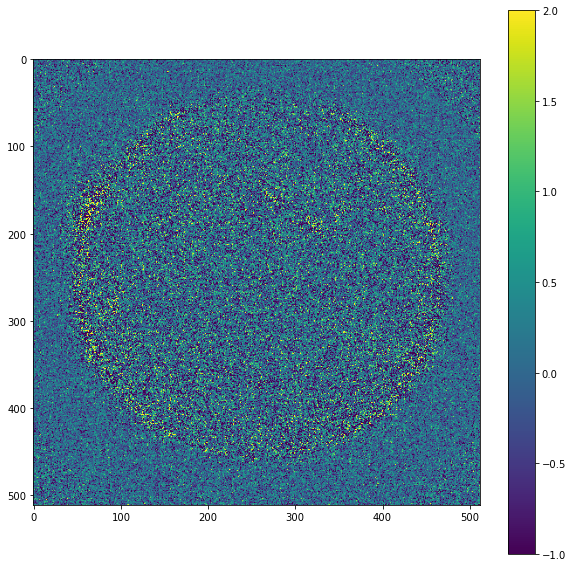

In [5]:
#Just a plot for the Difference from the start

plt.figure(figsize=(10,10))
plt.imshow(Diff[0],vmin = -1, vmax = 2)  
plt.colorbar()
plt.show()

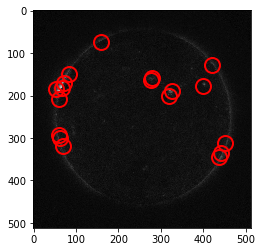

In [6]:
#locates Gaussian-like blobs of Sun
f = tp.locate(Arr[1], 5, invert=True, minmass=5) 

tp.annotate(f,Arr[1]);#Creates graph of f

In [7]:
r = tp.batch(Arr,5, minmass =5); 

Frame 42: 93 features


In [8]:
t = tp.link(r, 5, memory=4)

Frame 42: 93 trajectories present.


In [9]:
t1 = tp.filter_stubs(t,42) #Filters out Spurious traj 
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 311
After: 20


In [10]:
#Filters our particls from t1 
t2 = t1[((t1['mass'] <20 ) & (t1['size'] > 1.125) &
         (t1['ecc'] < 1))] 

In [11]:
R = 203.211425

In [12]:
iloc_valid = []

for i in range(len(t2)):
    r = np.sqrt((t2['x'].iloc[i]- 258.853546125)**2 + (t2['y'].iloc[i] - 251.0950775)**2)
    if r<R: 
        (r, t2['particle'].iloc[i])
        iloc_valid.append(i) 
    

In [13]:
fra = max(t2.iloc[iloc_valid]['frame']) + 1

In [14]:
Bull=[]
for i in range(fra): 
    s= t2.iloc[iloc_valid].loc[i].sum(axis=0).loc['signal']  
    Bull+=[s]

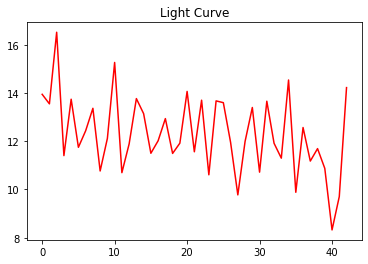

In [15]:
x = np.array(range(fra))
y = np.array(Bull)

plt.title('Light Curve')
plt.plot(x, y, color="red")

plt.show()